In [1]:
#Hier weren die Daten geladen

import numpy as np
import os

#Directory an dem die Daten sind
directory = "/home/jovyan/Praktikum_P2/240_Hysterese" #Directory
Messdaten = "240b.txt" #Dateiname

#Directory Festlegen und anzeigen
os.chdir(directory) #geht ins gewünschte Directory
directory_path = os.getcwd() #Derzeitiges Directory
print("My current directory is : " + directory_path)
folder_name = os.path.basename(directory_path) #Derzeitiger Ordner
print("My directory name is : " + folder_name)

#Daten Laden und ausgeben
data = np.loadtxt(Messdaten)
print(data) 

#Spalten der Datei auslesen
columb1 = data[:,0] #1.Spalte
columb2 = data[:,1] #2.Spalte
columb3 = data[:,2] #3.Spalte

My current directory is : /home/jovyan/Praktikum_P2/240_Hysterese
My directory name is : 240_Hysterese
[[ 0.00000e+00  0.00000e+00 -1.00000e+00          nan]
 [ 0.00000e+00 -1.50000e-03 -1.00000e+00          nan]
 [ 1.00000e-01  0.00000e+00 -1.50000e+00          nan]
 ...
 [ 1.00101e+02  2.96550e+00 -9.42500e+02          nan]
 [ 1.00201e+02  2.96550e+00 -9.44000e+02          nan]
 [ 1.00301e+02  2.96550e+00 -9.46000e+02          nan]]


In [2]:
#Hier werden die Werte für die Aufgabe berechnet

import numpy as np

#240_b

#gemessene Werte
t = columb1
print("Zeit t:", t)
#print("Lenght t:", len(t))

I = columb2
print("Stromstaerke I:", I)
#print("Length I:", len(I))

B = (-columb3)/1000 #umrechnung in Tesla (SI-Einweit, damit die Formeln stimmen) und Graph an x-Achse spiegeln
print("Magnetische Flussdichte B:", B)
#print("Lenght B:", len(B))

#gegebene Werte für die Formlen:
N = 2*500 #Gesammtwindungszahl aus 2 Spule zusammengesetzt
l_Fe = 0.477 #Länge eines Weges durch die Mitte des Eisenkerns in Meter (Laut Anleitung: 477 +- 4mm)
My_0 = 1.25663706212e-6 #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
d = 0.002 #Dicke des Spaltes in Meter (Laut Anleitung: 2 +- 0,05 mm)

#Berechnung der magnetischen Feldstärke
H = ((N*I)/l_Fe)-(d/(My_0*l_Fe))*B #Formel: 240.2 S.50
print("Magnetische Feldstärke H:", H)

#Fehlerrechnung
N_err = 0 #0, da Natürliche Zahl
print("Fehler auf N:", N_err)
l_Fe_err=4/1000 # in Meter
print("Fehler auf l_Fe:", l_Fe_err)
My_0_err= 1.9*10**(-10)*10**(-6) #in N/A^-2 , Literaturwert https://physics.nist.gov/cgi-bin/cuu/Value?mu0 (Stand 02.11.2022)
print("Fehler auf My_0:", My_0_err)
d_err=0.05/1000 # in Meter
print("Fehler auf d:", d_err)
I_err=I*0.01 #1% des Messwertes
print("Fehler auf I:", I_err)
B_err=B*0.03 #3% des Messwertes bei 20°C
print("Fehler auf B:", B_err)

#Fehlerquadrate der einzelnen Ableitungen(Teilergebnisse für H_err)
s1 = (N/l_Fe)*I_err #H nach I ableiten
s2 = (-B/(My_0*l_Fe))*d_err #H nach d ableiten
s3 = (-d/(My_0*l_Fe))*B_err #H nach B ableiten
s4 = ((B*d-I*My_0*N)/(My_0*l_Fe**2))*l_Fe_err #H nach l_Fe ableiten
s5 = ((d)/(My_0**2*l_Fe))*My_0_err #H nach My0 ableiten


#Fehler auf die magnetische Fledstärke
H_err = (s1**2+s2**2+s3**2+s4**2+s5**2)**(1/2)
print("Fehler auf H:", H_err)

Zeit t: [0.00000e+00 0.00000e+00 1.00000e-01 ... 1.00101e+02 1.00201e+02
 1.00301e+02]
Stromstaerke I: [ 0.0000e+00 -1.5000e-03  0.0000e+00 ...  2.9655e+00  2.9655e+00
  2.9655e+00]
Magnetische Flussdichte B: [0.001  0.001  0.0015 ... 0.9425 0.944  0.946 ]
Magnetische Feldstärke H: [  -3.33658161   -6.4812357    -5.00487242 ... 3072.25296054 3067.24808811
 3060.57492489]
Fehler auf N: 0
Fehler auf l_Fe: 0.004
Fehler auf My_0: 1.8999999999999998e-16
Fehler auf d: 5e-05
Fehler auf I: [ 0.0000e+00 -1.5000e-05  0.0000e+00 ...  2.9655e-02  2.9655e-02
  2.9655e-02]
Fehler auf B: [3.0000e-05 3.0000e-05 4.5000e-05 ... 2.8275e-02 2.8320e-02 2.8380e-02]
Fehler auf H: [1.33267961e-01 1.44638482e-01 1.99901942e-01 ... 1.40035817e+02
 1.40199541e+02 1.40417985e+02]


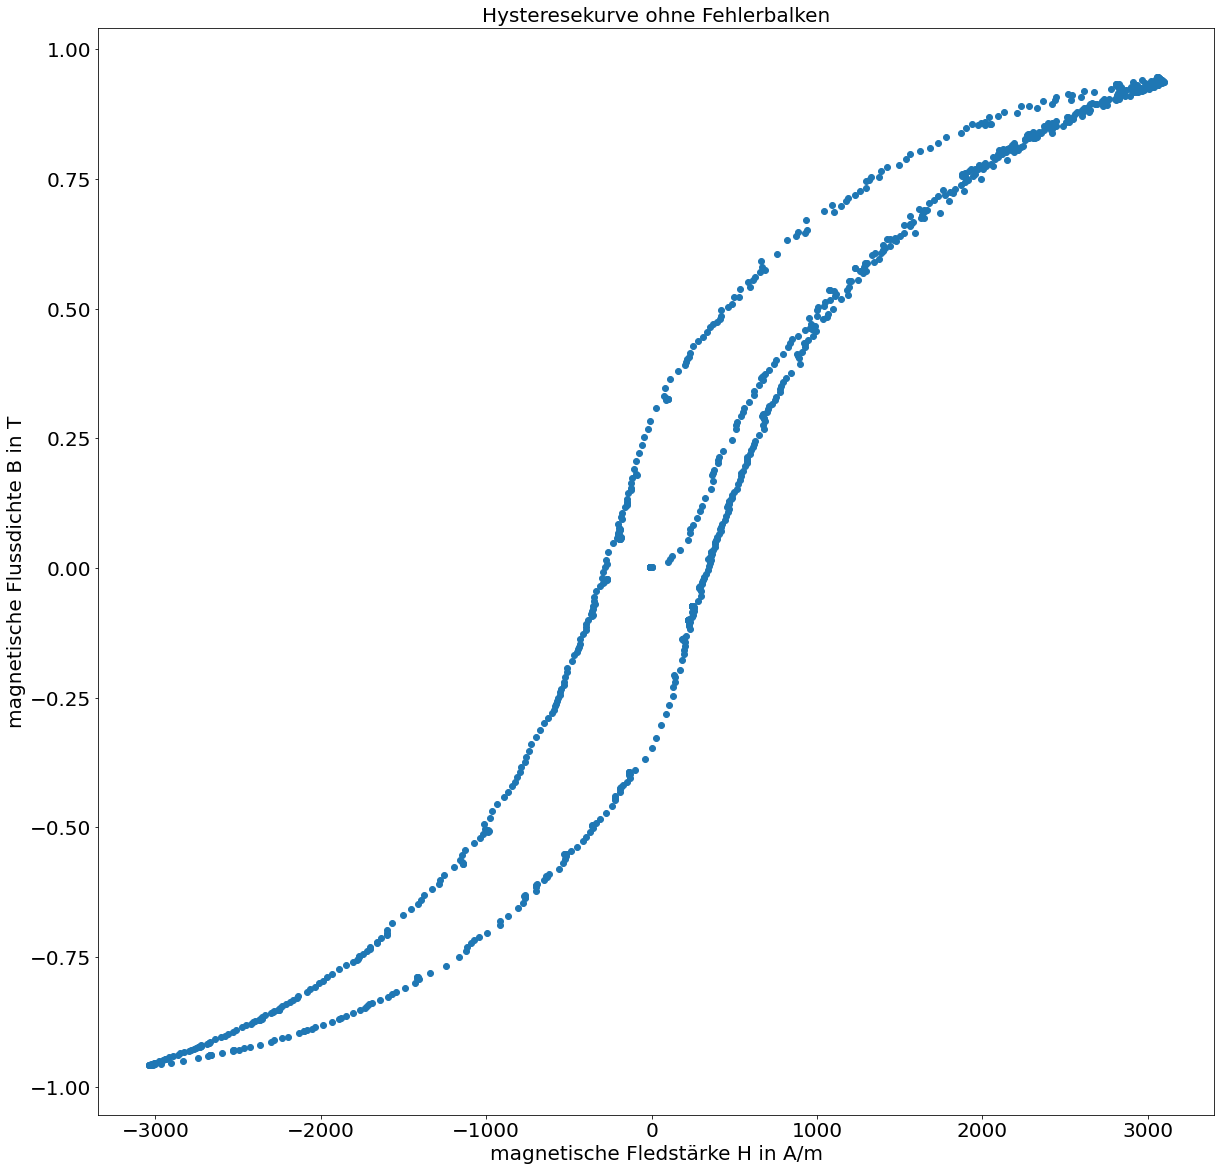

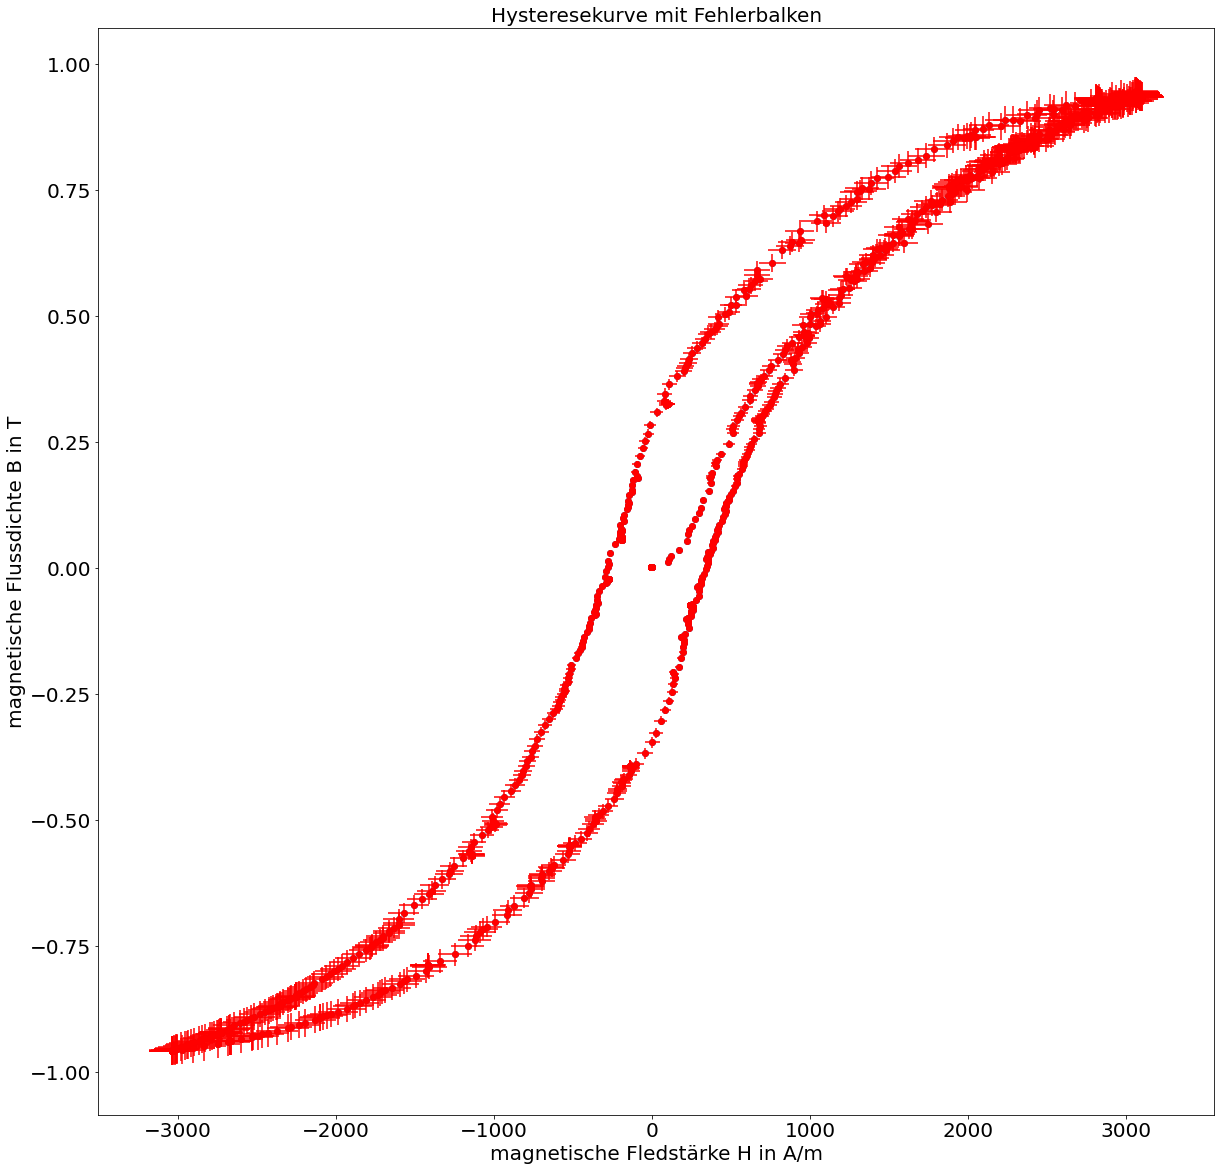

In [3]:
#Hier wird der Plot erstellt

from kafe2 import XYContainer, Fit, Plot
import matplotlib.pyplot as plt
import numpy as np

plt.rc ('font', size = 20) # steuert die Standardtextgröße
plt.rc ('axes', titlesize = 20) # Schriftgröße des Titels
plt.rc ('axes', labelsize = 20) # Schriftgröße der x- und y-Beschriftungen
plt.rc ('xtick', labelsize = 20) #Schriftgröße der x-Tick-Labels
plt.rc ('ytick', labelsize = 20) #Schriftgröße der y-Tick-Labels
plt.rc ('legend', fontsize = 20) #Schriftgröße der Legende

#Plot ohne Fehlerbalken
plt.figure(figsize=(20,20)) #Größe des Bildes
plt.scatter(H,B) #eigentlicher Plot
plt.xlabel("magnetische Fledstärke H in A/m") #Achsenbeschriftung x-Achse
plt.ylabel("magnetische Flussdichte B in T") #Achsenbeschriftung y-Achse
plt.title("Hysteresekurve ohne Fehlerbalken") #Titel des Plots
plt.show #Plot anzeigen
plt.savefig('240c_ohne_Fehlerbalken.jpg', dpi = 300) #Plot als Datei abspeichern

#Plot mir Fehlerbalken
plt.figure(figsize=(20,20)) #Größe des Bildes
plt.scatter(H,B) #eigentlicher Plot
plt.xlabel("magnetische Fledstärke H in A/m") #Achsenbeschriftung x-Achse
plt.ylabel("magnetische Flussdichte B in T") #Achsenbeschriftung y-Achse
plt.title("Hysteresekurve mit Fehlerbalken") #Titel des Plots
plt.errorbar(H, B, xerr=H_err, yerr=B_err, fmt="o", color="r") #Fehlerbalken, color r = Rot
plt.show #Plot anzeigen
plt.savefig('240c_mit_Fehlerbalken.jpg', dpi = 300) #Plot als jpg-Datei abspeichern